## Observations and Insights 
1. There is a very strong positive correlation between mouse weight and average tumour volume in mice treated with Capomulin (correlation of 0.8419363424694717).
2. There is a very strong negative correlation between days passed and tumour volume for mouse x401 which was treated with Capomulin (correlation of -0.975938749290357). This suggests that Capomulin is a very affective treatment for reducing tumour volume.
3. When plotting the final tumour volume accross the four most promising treatment regimens (Capomulin, Ramicane, Infubinol and Ceftamin), only one outlier was observed. This suggests that the results are fairly consistent.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on="Mouse ID",how='outer')

# Display the data table for preview
df = df.dropna()
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(df['Mouse ID'].value_counts())
print(f'Number of mice = {mouse_count}')

# Double check number of mice
df['Mouse ID'].nunique()

Number of mice = 249


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)

df['Duplicate'] = duplicates
duplicate_mice_df = df.loc[df['Duplicate']== True,:]

print(duplicate_mice_df['Mouse ID'].value_counts())

g989    10
Name: Mouse ID, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_df = df.loc[df['Mouse ID']=='g989',:]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df.loc[df['Mouse ID']!='g989',:]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_count = clean_df['Mouse ID'].nunique()
print(f'Number of mice in clean DataFrame: {mouse_count}')


Number of mice in clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = clean_df.groupby('Drug Regimen')
mean_se = summary_stats_df['Tumour Volume (mm3)'].mean()
median_se = summary_stats_df['Tumour Volume (mm3)'].median()

summary_stats = pd.merge(mean_se,median_se,on=['Drug Regimen'])
summary_stats = summary_stats.rename(columns={'Tumour Volume (mm3)_x':'Mean',
                              'Tumour Volume (mm3)_y':'Median'})

sdev = summary_stats_df['Tumour Volume (mm3)'].std()
var = summary_stats_df['Tumour Volume (mm3)'].var()

summary_stats['Variance']=var
summary_stats['St.Deviation']=sdev
sem = summary_stats_df['Tumour Volume (mm3)'].sem()
summary_stats['SEM']=sem
summary_stats.head()


,Mean,Median,Variance,St.Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.

aggr_summary = clean_df.agg({'Tumour Volume (mm3)': ['mean','median','var','std','sem']})
aggr_summary


,Tumour Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

In [9]:
timepoints = clean_df['Drug Regimen'].value_counts()
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

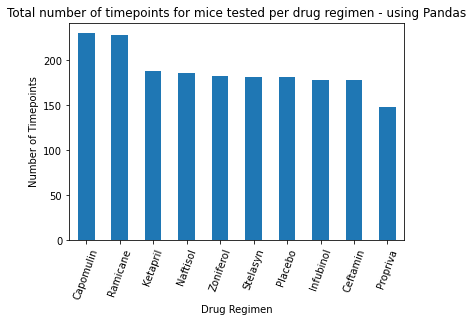

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig1 = timepoints.plot(kind='bar',title='Total number of timepoints for mice tested per drug regimen - using Pandas')
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Timepoints")
xtick=timepoints.index
fig1.set_xticklabels(xtick, rotation=70)
plt.show()

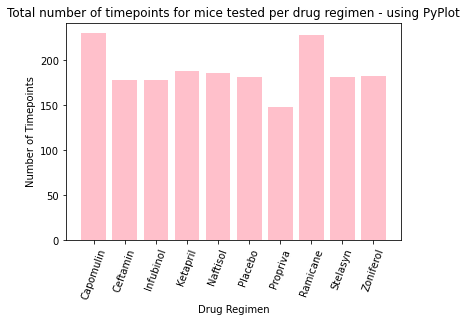

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = timepoints.sort_index()
drug_list = clean_df['Drug Regimen'].unique()
drug_list.sort()

plt.bar(drug_list,timepoints,color='pink',align='center')
plt.title('Total number of timepoints for mice tested per drug regimen - using PyPlot')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
new_list = [value for value in drug_list]
plt.xticks(new_list,rotation=70)
plt.show()

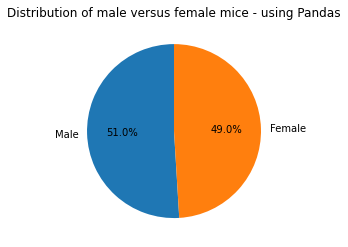

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distr = clean_df['Sex'].value_counts()

pd_pie = sex_distr.plot(kind='pie',y='Sex', autopct='%1.1f%%'\
    ,title='Distribution of male versus female mice - using Pandas',startangle=90)
plt.axis('off')
plt.show()

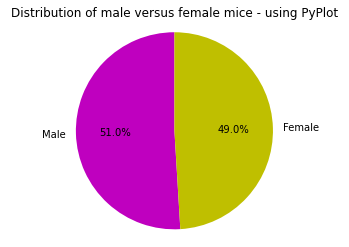

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fem_df = clean_df.loc[clean_df['Sex']=='Female',:]
mle_df = clean_df.loc[clean_df['Sex']=='Male',:]
count = [len(mle_df),len(fem_df)]
labels = ['Male','Female']
colours = ['m','y']
plt.pie(count,labels=labels,colors=colours,autopct="%1.1f%%",startangle=90)
plt.axis('equal')
plt.title('Distribution of male versus female mice - using PyPlot')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tumour = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumour = max_tumour.reset_index()
merged_df = max_tumour.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites,Duplicate
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,False
244,z578,45,Ramicane,Male,11,16,30.638696,0,False
245,z581,45,Infubinol,Female,24,25,62.754451,3,False
246,z795,45,Naftisol,Female,13,29,65.741070,3,False


In [15]:
# Put treatments into a list for for loop (and later for plot labels).
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_list =[]

for drug in treatment_list:
    new_df = merged_df.loc[merged_df['Drug Regimen'] == drug,'Tumour Volume (mm3)']
    tumour_list.append(new_df)
   

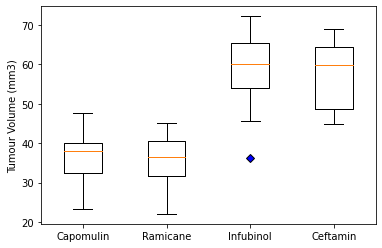

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumour Volume (mm3)')
diamond = dict(markerfacecolor='b', marker='D')
ax1.boxplot(tumour_list, labels=treatment_list, flierprops=diamond)

plt.show()

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

i=-1
for tumour_group in tumour_list:
    outliers = []
    quartiles = tumour_group.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    i = i +1
    print(f"The interquartile range of {treatment_list[i]} is: {iqr}")
    print(f'Values below {lower_bound} for {treatment_list[i]} are outliers.')
    print(f"Values above {upper_bound} for {treatment_list[i]} are outliers.")
    for value in tumour_group:
        if value<lower_bound:
            outliers.append(value)
        elif value>upper_bound:
            outliers.append(value)
    print(f'Outliers for {treatment_list[i]} = {outliers}')

The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin are outliers.
Values above 51.83201549 for Capomulin are outliers.
Outliers for Capomulin = []
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane are outliers.
Values above 54.30681135 for Ramicane are outliers.
Outliers for Ramicane = []
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol are outliers.
Values above 82.74144559000001 for Infubinol are outliers.
Outliers for Infubinol = [36.321345799999996]
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 for Ceftamin are outliers.
Values above 87.66645829999999 for Ceftamin are outliers.
Outliers for Ceftamin = []


## Line and Scatter Plots

-0.975938749290357


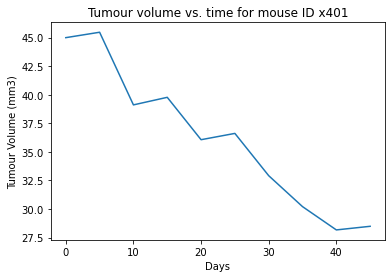

In [18]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capo_mice_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
capo_mice_df = capo_mice_df.reset_index()
test_mouse_df = clean_df.loc[clean_df['Mouse ID']=='x401',:]

timepoints_list=test_mouse_df['Timepoint'].values.tolist()
tmvol_list=test_mouse_df['Tumour Volume (mm3)'].values.tolist()
plt.plot(timepoints_list,tmvol_list)
plt.xlabel('Days')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Tumour volume vs. time for mouse ID x401')
corr2 = st.pearsonr(timepoints_list, tmvol_list)[0]
print(corr2)
plt.show()


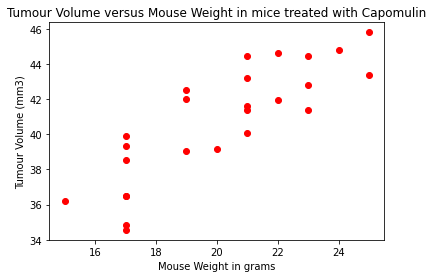

In [19]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
gr_capo_mice_df = capo_mice_df.groupby('Mouse ID').mean()
weight = gr_capo_mice_df['Weight (g)'].values.tolist()
capo_tumours = gr_capo_mice_df['Tumour Volume (mm3)'].values.tolist()
plt.title('Tumour Volume versus Mouse Weight in mice treated with Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumour Volume (mm3)')
plt.scatter(weight,capo_tumours, marker='o',facecolors='r')

plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

corr = st.pearsonr(weight, capo_tumours)[0]
print(f'Correlation coefficient is {corr}')

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(weight, capo_tumours)

print('Linear regression equation: Tumour volume = Mouse weight * 0.9544396890241045 + 21.552160532685015')


Correlation coefficient is 0.8419363424694717
Linear regression equation: Tumour volume = Mouse weight * 0.9544396890241045 + 21.552160532685015


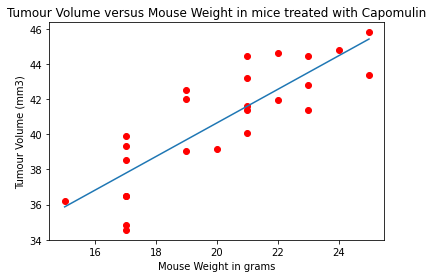

In [21]:
y_values = []
x_values = []
for x in range(15,26):
    y = x * slope + intercept
    x_values.append(x)
    y_values.append(y)
y_values
plt.title('Tumour Volume versus Mouse Weight in mice treated with Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Tumour Volume (mm3)')
plt.scatter(weight,capo_tumours, marker='o',facecolors='r')
plt.plot(x_values, y_values)
plt.show()